<a href="https://colab.research.google.com/github/racrijoli/FinalProject_Coderhouse/blob/main/Alternativa_Projeto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
# Importanto os pacotes!

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics

from sklearn import tree
from sklearn.model_selection import train_test_split

import urllib.request
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import numpy as np
from sklearn.linear_model import LogisticRegression
from pandas_profiling import ProfileReport

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from scipy.stats import ks_2samp
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import r2_score

In [20]:
# Resolvi não filtrar não-resposta pra ver o que vai dar. Provavelmente vai dar
# problema, mas vamo que vamo.
#
# Ainda estamos vendo o que fazer com a variável "cntry". A verdade é que
# trabalhar com o número de variáveis que o Pedro tava pensando em usar só tem
# dado problema nos treinamentos de modelo.

df = pd.read_csv("/content/ESS10.csv")

df2 = df[["nwspol", "netusoft", "ppltrst", "polintr", "psppsgva",
          "trstplt", "vote", "donprty"]]

df2

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (506,507) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,nwspol,netusoft,ppltrst,polintr,psppsgva,trstplt,vote,donprty
0,80,1,5,4,1,3,2,2
1,63,5,0,1,4,6,1,2
2,390,5,5,3,3,3,1,2
3,60,5,5,4,1,0,2,2
4,120,5,4,1,3,0,1,2
...,...,...,...,...,...,...,...,...
18055,120,2,5,4,3,7,1,2
18056,90,4,7,2,3,8,1,2
18057,30,2,0,2,3,1,1,2
18058,30,5,2,4,3,7,1,2


In [33]:
%pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     | 22.0 MB 22.1 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 KB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 72.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 85.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 KB 32.7 MB/s eta 0:00:00
  Created wheel for pandas-profiling: filename=pandas_profiling-dev-py2.py3-none-any.whl size=328711 sha256=8b8e98285c7e3b155b71baf17b236e5890c01513fbc7d7a6ef8e67502e021fb6
  Stored in directory: /tmp/pip-ephem-wheel-cache-gagpb95o/wheels/64/b6/85/dfc808b23666a5910371784e349d28818006ff63ed9cfeca59
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha25

In [34]:
# Gerando relatório de Análise Exploratório dos Dados

relatorio = ProfileReport(df2)
relatorio

OSError: ignored

In [3]:
# A "donprty" será minha variável target. Mede doação a partido político!
# Legenda:
# 1	Yes
# 2	No
# 7	Refusal*
# 8	Don't know*
# 9	No answer*

df2["donprty"].value_counts()

2    17255
1      603
8      120
9       43
7       39
Name: donprty, dtype: int64

In [4]:
#Separando em x e y.

x = df2.drop("donprty", axis = 1)
y = df2.donprty

In [5]:
y

0        2
1        2
2        2
3        2
4        2
        ..
18055    2
18056    2
18057    2
18058    2
18059    2
Name: donprty, Length: 18060, dtype: int64

In [6]:
x

,nwspol,netusoft,ppltrst,polintr,psppsgva,trstplt,vote
0,80,1,5,4,1,3,2
1,63,5,0,1,4,6,1
2,390,5,5,3,3,3,1
3,60,5,5,4,1,0,2
4,120,5,4,1,3,0,1
...,...,...,...,...,...,...,...
18055,120,2,5,4,3,7,1
18056,90,4,7,2,3,8,1
18057,30,2,0,2,3,1,1
18058,30,5,2,4,3,7,1


In [7]:
# Dividindo 30% para teste e 70% para treino.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, 
                                                          random_state = 42) 

In [8]:
dstree = DecisionTreeClassifier(max_depth = 2, min_samples_leaf = 5, 
                                criterion = "gini", random_state = 43)

In [9]:
#Ajuste do modelo.

modelo = dstree.fit(x_train, y_train)

In [10]:
y_train_pred = modelo.predict(x_train)
y_test_pred  = modelo.predict(x_test)

In [11]:
#Calculo da acurácia do treino
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo da acurácia do teste
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% Acertos treino:', train_accuracy)
print('% Acertos teste:', test_accuracy)

% Acertos treino: 0.9561778199651954
% Acertos teste: 0.953672942045035


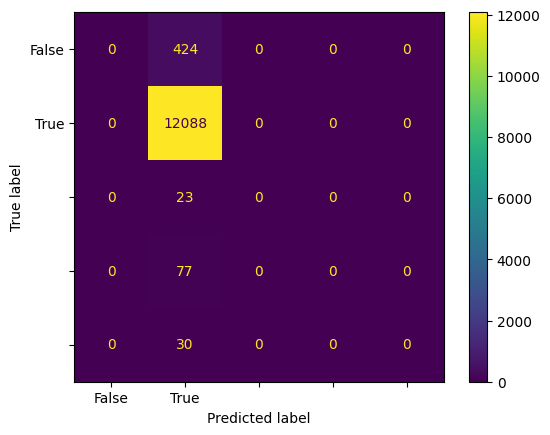

In [36]:
# confusion_matrix0 = metrics.confusion_matrix(y_train, y_train_pred)
# confusion_matrix1 = metrics.confusion_matrix(y_test, y_test_pred)

# print(confusion_matrix0, "\n","\n",confusion_matrix1)

confusion_matrix1 = metrics.confusion_matrix(y_train, y_train_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix1,
                                            display_labels = [False, True])

cm_display.plot()
plt.show()

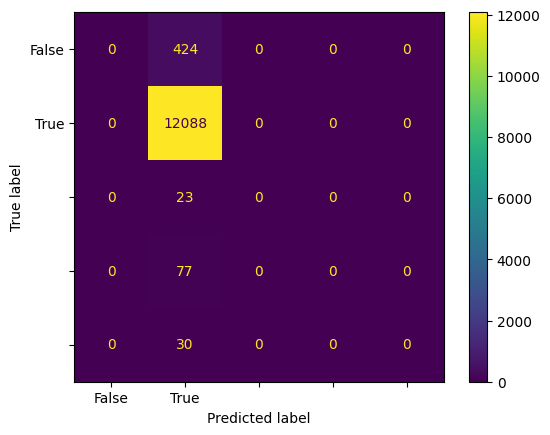

In [37]:
confusion_matrix2 = metrics.confusion_matrix(y_test, y_test_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix1,
                                            display_labels = [False, True])

cm_display.plot()
plt.show()

In [17]:
x_train.count()

nwspol      12642
netusoft    12642
ppltrst     12642
polintr     12642
psppsgva    12642
trstplt     12642
vote        12642
dtype: int64

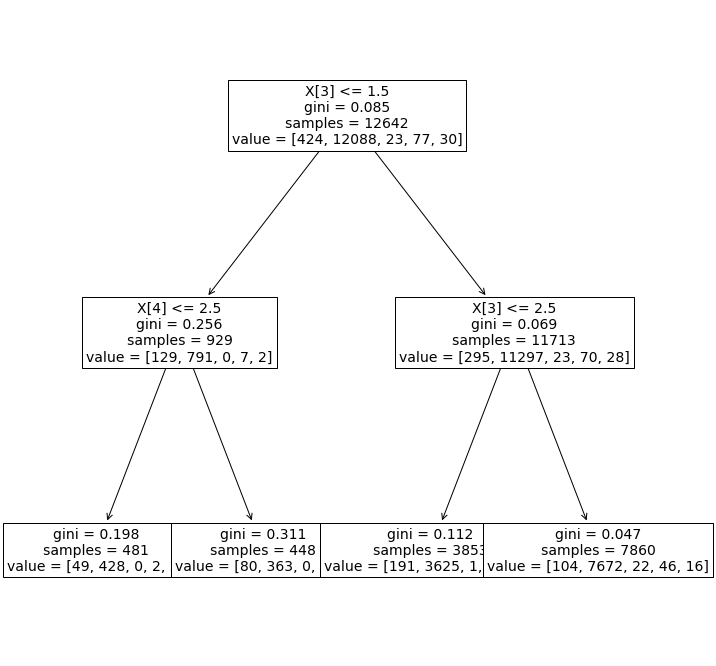

In [18]:
plt.figure(figsize = (12,12)) 
tree.plot_tree(modelo, fontsize=14)
plt.show()

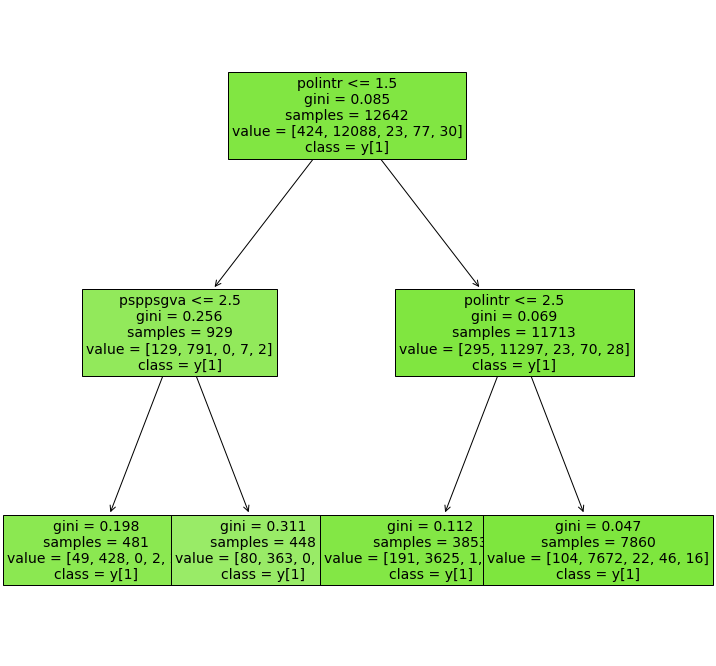

In [19]:
plt.figure(figsize=(12,12)) 
tree.plot_tree(modelo, fontsize = 14, class_names = True, 
               feature_names = x.columns, filled = True)
plt.show()

# Random Forest e DecisionTreeClassifier

In [21]:
dstree = DecisionTreeClassifier(random_state=11).fit(x_train, y_train)

y_test_pred = dstree.predict(x_test)

In [22]:
# Achei a acurácia bem boa.

test_accuracy = accuracy_score(y_test, y_test_pred)

print('% Acurácia:', test_accuracy)

% Acurácia: 0.9049464747139165


In [25]:
rf = RandomForestClassifier(random_state=11).fit(x_train, y_train)

y_test_pred = rf.predict(x_test)

In [26]:
# Pra nossa base foi igual no exemplo da aula: Random Forest melhor que
# DecisionTreeClassifier. Assim, não foi aqueeela diferença, mas fica aí a 
# observação.

test_accuracy = accuracy_score(y_test, y_test_pred)

print('% Acurácia:', test_accuracy)

% Acurácia: 0.9483204134366925


# Regressão Logística

In [27]:
# Aqui vou tentar usar a regressão logística pra saber a probabilidade de uma
# pessoa que faz doações políticas ("donprty") votar ("vote"). Pra isso, vou
# filtrar não resposta na variável vote, pra deixar só 1 (sim) ou 2 (não).
#
# Legenda das medições da variável "vote":
# 1	Yes
# 2	No
# 3	Not eligible to vote
# 7	Refusal*
# 8	Don't know*
# 9	No answer*

df2_filtrada = df2.loc[(df2["vote"] != 8) &
                (df2["vote"] != 7) & (df2["vote"] != 9) & (df2["vote"] != 3)]

df2_filtrada

,nwspol,netusoft,ppltrst,polintr,psppsgva,trstplt,vote,donprty
0,80,1,5,4,1,3,2,2
1,63,5,0,1,4,6,1,2
2,390,5,5,3,3,3,1,2
3,60,5,5,4,1,0,2,2
4,120,5,4,1,3,0,1,2
...,...,...,...,...,...,...,...,...
18055,120,2,5,4,3,7,1,2
18056,90,4,7,2,3,8,1,2
18057,30,2,0,2,3,1,1,2
18058,30,5,2,4,3,7,1,2


In [28]:
# Bom, x vai ser "donprty" e y, "vote". Espero que o fato de não ter filtrado
# "donprty" pra tirar não respostas não dê problema.
# (narrador: vai dar problema sim!)
# Tava dando erro pois as colunas são Series, então converti pra array e mandei
# um reshape. Vamos ver se vai.

a = df2_filtrada["donprty"]
b = df2_filtrada["vote"]

x = a.to_numpy().reshape(-1,1)
y = b.to_numpy().reshape(-1,1)

In [29]:
reg_logistica = LogisticRegression().fit(x, y)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [51]:
print('Pontuação de treinamento: ', reg_logistica.score(x_train, y_train))

Pontuação de treinamento:  0.7206937799043063


In [53]:
# Predições
y_pred = reg_logistica.predict(x_test)

In [56]:
# Não entendi porque está negativo.

print('Testing: ', r2_score(y_test, y_pred))

Testing:  -0.3928373126041089


In [30]:
# Aqui vou colocar a legenda das medições de "donprty", pra você entender os
# valores de x_novo!
#
# 1	Yes
# 2	No
# 7	Refusal*
# 8	Don't know*
# 9	No answer*

x_novo = np.array([1, 2, 7, 8, 9]).reshape(-1,1)

pred = reg_logistica.predict(x_novo)
print(pred)

[1 1 1 1 1]


In [31]:
# Acho que deu certo! Agora... só estou confusa se calculou aqui probabilidade
# de votar ou de não votar :D

prob = reg_logistica.predict_proba(x_novo)
print(prob[:,1])

[0.26026158 0.2793873  0.38651866 0.40978286 0.43345796]


In [60]:
# Intercepto

print(reg_logistica.intercept_)

[-1.14171605]


In [62]:
# Coeficiente

print(reg_logistica.coef_)

[[0.09710662]]


In [64]:
# Tentando predição de novo

y_pred_train = reg_logistica.predict(x_train)
y_pred_test  = reg_logistica.predict(x_test)

In [76]:
df3 = pd.DataFrame({'Observado': y_test, 'Predito': y_pred_test})
df3

ValueError: ignored

In [66]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_train))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_train))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print('R2 Score:', r2_score(y_train, y_pred_train))

Mean Absolute Error: 0.2793062200956938
Mean Squared Error: 0.2793062200956938
Root Mean Squared Error: 0.5284942952347677
R2 Score: -0.38755186721991697


In [67]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test))
print('Mean Squared Error:',  metrics.mean_squared_error(y_test, y_pred_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
print('R2 Score:', r2_score(y_test, y_pred_test))

Mean Absolute Error: 0.28204106039465815
Mean Squared Error: 0.28204106039465815
Root Mean Squared Error: 0.5310753810850755
R2 Score: -0.3928373126041089


In [69]:
1 - (1- r2_score(y_test, y_pred_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

-0.3931150468638507

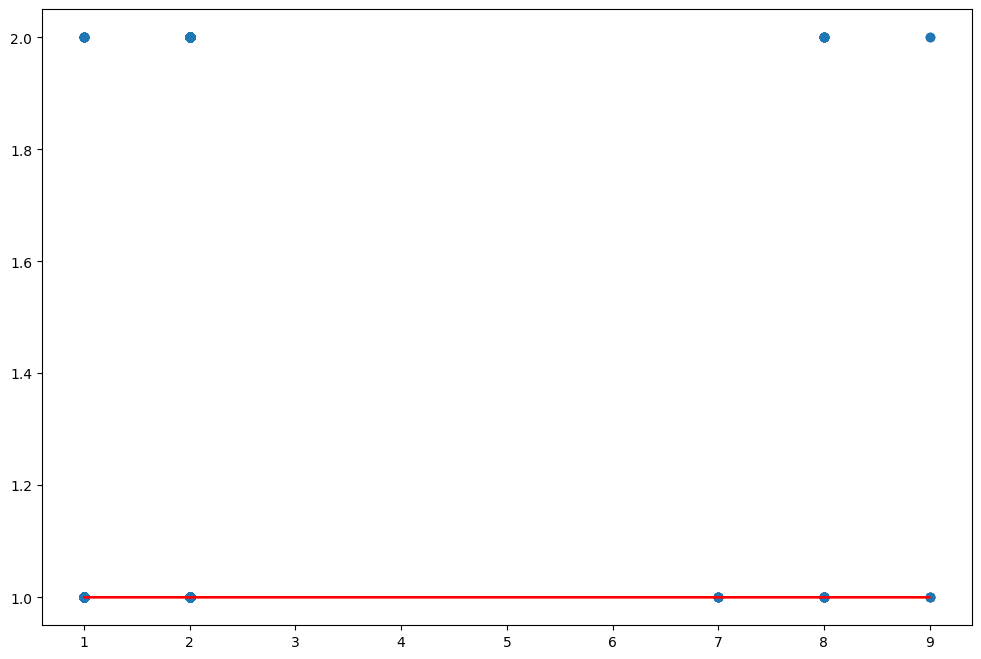

In [72]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred_test, color='r')

plt.show()

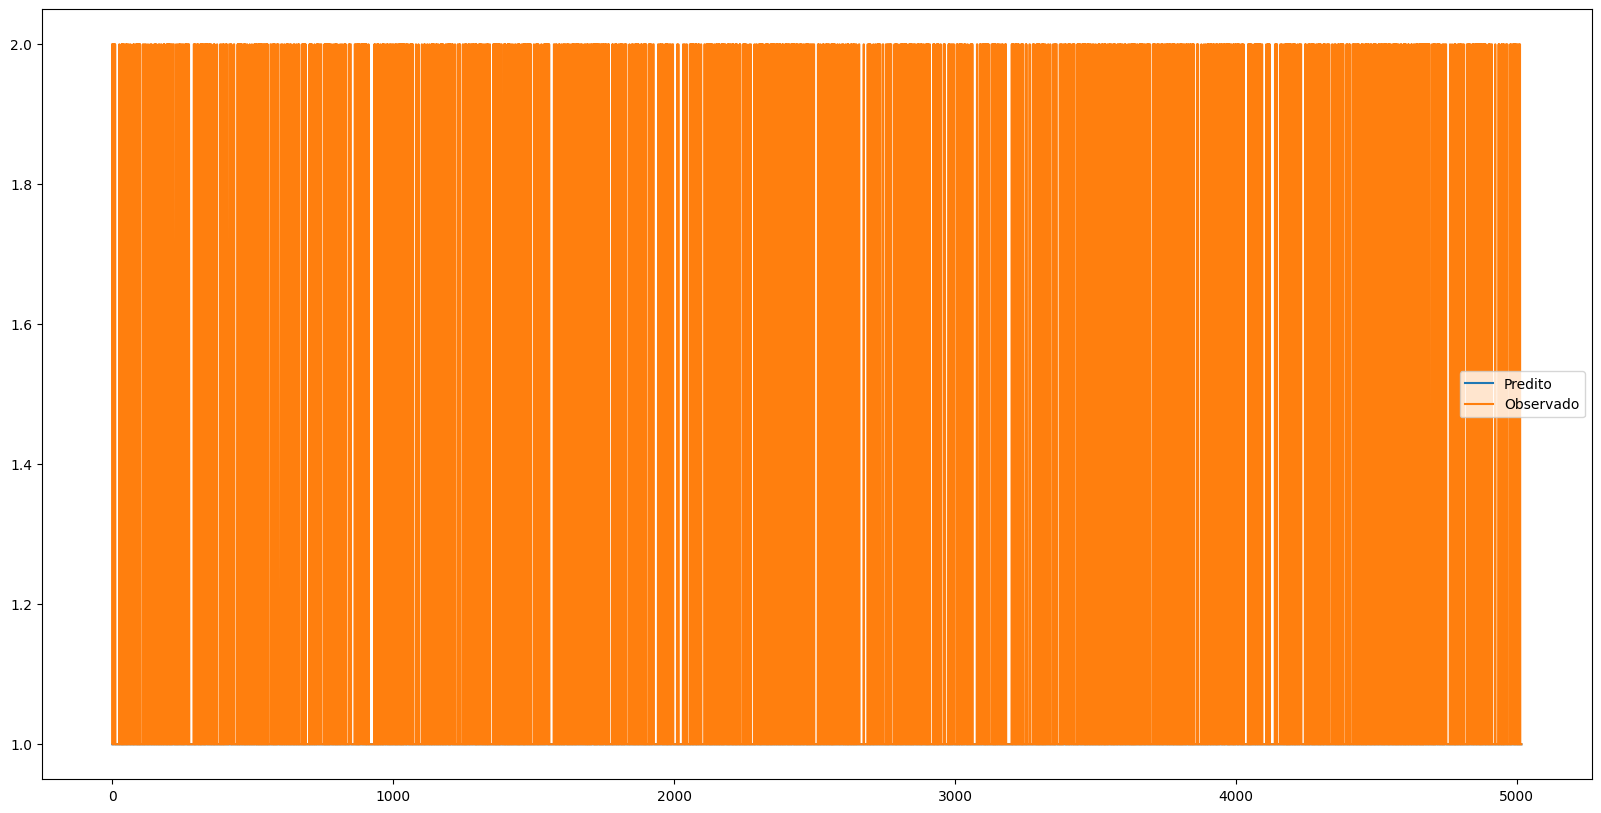

In [73]:
#Plots
plt.figure(figsize = (20,10))

plt.plot(y_pred_test, label='Predito')
plt.plot(y_test, label = 'Observado')

plt.legend()
plt.show()

In [78]:
regrf = RandomForestRegressor(max_depth=2, random_state=0).fit(x_train, y_train)

# Predição

y_pred_train_rf = regrf.predict(x_train)
y_pred_test_rf  = regrf.predict(x_test)

dfrf = pd.DataFrame({'Observado': y_test, 'Predito': y_pred_test_rf})
dfrf

<ipython-input-78-30006510d5e1>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regrf = RandomForestRegressor(max_depth=2, random_state=0).fit(x_train, y_train)


ValueError: ignored

# Seleção de algoritmo e treinamento de modelo

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30,
                                                    random_state = 42)
print(f"Train Data: {x_train.shape}, {y_train.shape}")
print(f"Train Data: {x_test.shape}, {y_test.shape}")

classifier = RandomForestClassifier(random_state = 18)
classifier.fit(x_train, y_train)

predictions = classifier.predict(x_test)

Train Data: (11704, 1), (11704, 1)
Train Data: (5017, 1), (5017, 1)


<ipython-input-39-1893a8a96598>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train, y_train)


In [40]:
acur = accuracy_score(y_test, predictions)
print(f"Accuracy of the classifier is: {acur}")

Accuracy of the classifier is: 0.7179589396053419


[[3602    0]
 [1415    0]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


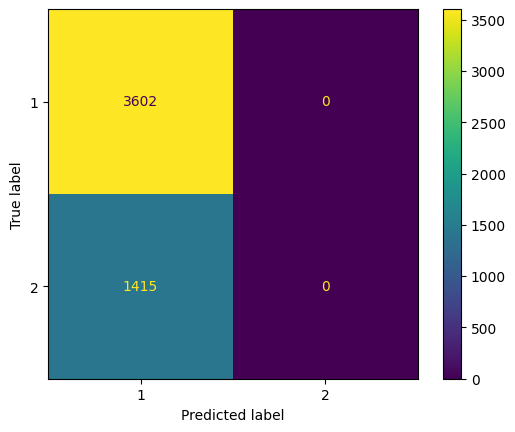

In [42]:
# Matriz de Confusão

print(confusion_matrix(y_test, predictions))

plot_confusion_matrix(classifier, x_test, y_test)
plt.show()

In [43]:
prec = precision_score(y_test, predictions)
print(f"Precisão: {prec}")

Precisão: 0.7179589396053419


In [44]:
# Recall ou Sensibilidade

rec = recall_score(y_test, predictions)
print(f"Recall: {rec}")

Recall: 1.0


In [46]:
# Calculo do F1 score

f1 = f1_score(y_test, predictions)

print(f"F1 Score: {f1}")

F1 Score: 0.8358278222531617


AUC for our classifier is: 0.4840541081417273


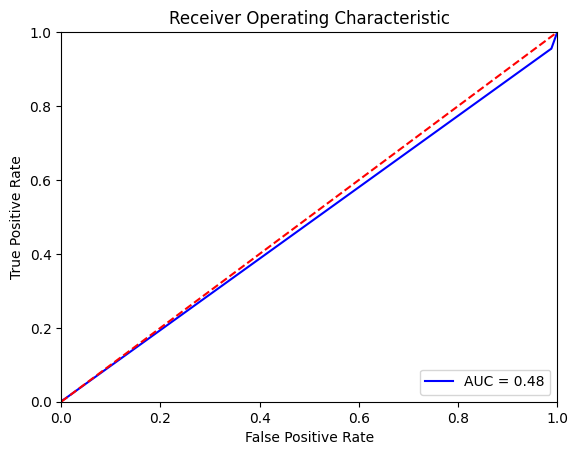

In [49]:
# CURVA - ROC
class_probabilities = classifier.predict_proba(x_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds, pos_label = 1)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plot da Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [48]:
KS = ks_2samp(predictions[predictions == 0], predictions[predictions == 1])
print(f"KS: {round(KS[0],2)*100}")

ValueError: ignored